<a href="https://colab.research.google.com/github/JessMog/Music-genre-classification/blob/main/GTZAN_Music_Genre_ClassificationFinal_Hazra%26Jesee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Music Genre Classifiation**-GTZAN

# **Introduction**

---


Music genre classification is the process  where a piece of music is recognized, understood and differentiated by a conventional category as belonging to a shared traditions set of conventions.
In this project we are interested in working on genre detection as a probabilistic distribution of various genres as they pertain to the underlying styles of songs,albums and artists.We will be using a neural network model for this.We shall be tagging 10 genres and fine tune our model to achieve higher accuracy.
The dataset used for this project is GTZAN Music Genre Classification from kaggle
Our Datasets contains 10 genres:-


1. Blues
2.classical
3.Disco
4.Hip hop
5.Jazz
6.Metal
7.pop
8.Reggae
9.Rock
10.Country

Why Classify music?


1.  Music genres are the best way for appreciating ,comprehending and communicating with one another.
2.To understand music in a greater context
3.To identify patterns
4.To recommend music
5.To find music in our taste
6.To enhance personal listening enjoyment
7.To honor creative decisions of artist





We are going to develop a deep learning project to automatically classify different musical genres from audio files. We will classify these audio files using their low-level features of frequency and time domain.
Task:classify a song by its genre

*   Task:classify a song by its genre

*   performance: Classification accuracy
*   supervised learning problem


*   Multi class classification
* Experience:songs   







## **Importing Libraries**

In [ ]:
# Importing various libraries to be used for this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import random
import librosa, IPython# librosa for preprocessing
import librosa.display as lplt
seed = 12
np.random.seed(seed)

In [ ]:
# Connecting to drive

from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


We will use GTZAN dataset downloaded from Kaggle


## **Loading Dataset**

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/GTZAN/Data/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,0.081851,0.000558,-0.000078,0.008354,-0.000068,0.005535,129.199219,-118.627914,2440.286621,125.083626,260.956909,-23.443724,364.081726,41.321484,181.694855,-5.976108,152.963135,20.115141,75.652298,-16.045410,40.227104,17.855198,84.320282,-14.633434,83.437233,10.270527,97.001335,-9.708279,66.669891,10.183875,45.103611,-4.681614,34.169498,8.417439,48.269444,-7.233477,42.770947,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,0.087173,0.001030,-0.000099,0.004950,-0.000103,0.004854,123.046875,-125.590706,2038.344238,122.421227,216.774185,-20.718019,231.979767,50.128387,142.700409,-11.333302,139.243118,21.385401,77.817947,-15.960796,97.364029,19.454103,57.948093,-12.465918,68.271523,17.898169,56.222176,-11.732554,54.373909,8.145000,40.662876,-7.717751,30.808521,8.397150,48.784225,-8.300493,68.584824,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,0.071383,0.000425,-0.000066,0.012476,0.000065,0.004357,123.046875,-132.441940,3798.532227,115.085175,257.321289,-14.811666,192.448074,50.189293,144.166031,-0.680819,128.376892,24.650375,66.371170,-13.506104,89.319336,15.643386,55.253967,-13.216637,120.308784,10.406025,35.757862,-7.991465,47.911613,11.853963,36.569931,-4.677677,40.725075,6.571110,30.686846,-2.424750,50.313499,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,0.069426,0.000304,-0.000014,0.008318,0.000018,0.005927,123.046875,-118.231087,2508.781006,132.116501,332.650574,-18.758335,109.357529,39.769306,184.693344,-13.260426,144.398224,20.468134,122.516464,-14.563448,68.937332,18.745104,74.748886,-13.755463,73.868576,12.993759,41.549564,-12.648887,58.540478,10.389314,39.102024,-4.362739,60.714748,9.156193,40.411537,-9.889441,44.666325,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,0.070095,0.000289,0.000041,0.009634,-0.000106,0.005833,123.046875,-105.968376,2118.919922,134.643646,219.562622,-19.961748,171.878754,40.171753,103.120712,-14.271939,102.651230,18.734617,79.070000,-15.619381,48.510284,19.207966,53.642956,-18.274683,95.300995,14.316693,58.821163,-5.792194,55.030254,17.045437,43.229939,-5.681399,46.515259,5.705521,24.956211,-7.986080,39.816933,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


### **About Dataset**

In [ ]:
print("The Dataset has" , df.shape)
print("Count of Positive and Negative samples")
df.label.value_counts().reset_index()

The Dataset has (9990, 60)
Count of Positive and Negative samples


,index,label
0,reggae,1000
1,pop,1000
2,metal,1000
3,jazz,1000
4,blues,1000
5,disco,999
6,hiphop,998
7,classical,998
8,rock,998
9,country,997


In [ ]:
df.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

## **Data Visualization**

In [ ]:
example_file = "disco.00001.wav"

In [ ]:
example_file

'disco.00001.wav'

In [ ]:
# load audio file with Librosa
signal, sample_rate = librosa.load(example_file)

In [ ]:
print(signal)

[-0.18777466 -0.23693848 -0.15542603 ...  0.03741455  0.10574341
  0.09619141]


In [ ]:
print(sample_rate)

22050


In [ ]:
FIG_SIZE = (16,8)

Text(0.5, 1.0, 'Waveform')

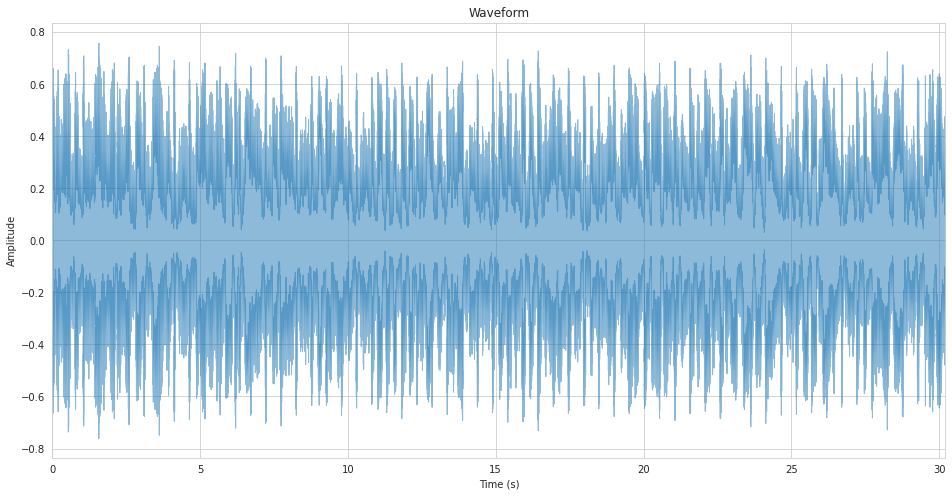

In [ ]:
# WAVEFORM
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal, sample_rate, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
# the waveform gives us amplitude and time as seen below.
#hence we want to move from time domain to frequency domain hence we use fourier transform

The Fourier Transform is an important image processing tool which is used to decompose an image into its sine and cosine components.

---


 The output of the transformation
represents the image in the Fourier or frequency domain, while the input image is the spatial domain equivalent.

The wave form gives us the amplitude and time , we want to move from time domain to frequency domain

From the figure above we can see that the audio is 30 seconds
A wave is a  summation of other function sin the frequency domain


In [ ]:
# Fourier Transform (FFT) - Frequency Domain
fft = np.fft.fft(signal)

In [ ]:
# Calculate the Magnitude (abs values on complex numbers)
spectrum = np.abs(fft)

In [ ]:
# Create the Frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

Text(0.5, 1.0, 'Power Spectrum')

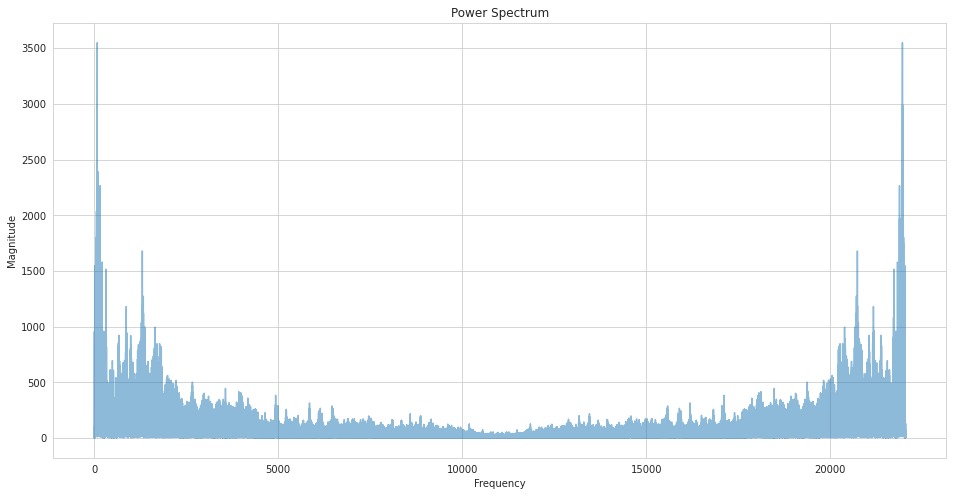

In [ ]:
# Plot Spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(f, spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [ ]:
#Power spectrum From the above we
# can see it has a stronger magnitude for lower frequencies and smaller magnitude
# for higher frequencies since its symmetric we can focus on the left half as implemented below
#

In [ ]:
# Take half of the spectrum and frequency

left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

Text(0.5, 1.0, 'Power Spectrum')

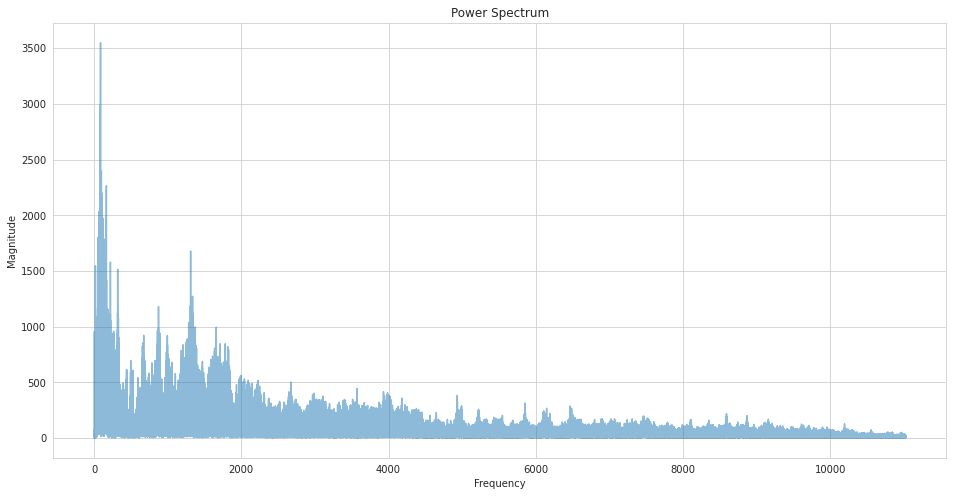

In [ ]:
# Plot Spectrum

plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")



*  We can see it has a stronger magnitude for lower frequencies and smaller magnitude,for higher frquencies.We however want to know how magnitude changes considering some time windows

---


*   Here we use Stft-Short term fourier transform
 windows specify the no of samples to be contained,we can specify the no samples to use


In [ ]:
# Spectrogram (STFT)(Short Term Fourier Function)

hop_length = 512 # num. of samples
n_fft = 2048 # num. of samples for window

In [ ]:
# Perform STFT

stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

In [ ]:
# Calculate the Magnitude (abs values on complex numbers)

spectrogram = np.abs(stft)

Text(0.5, 1.0, 'Spectrogram')

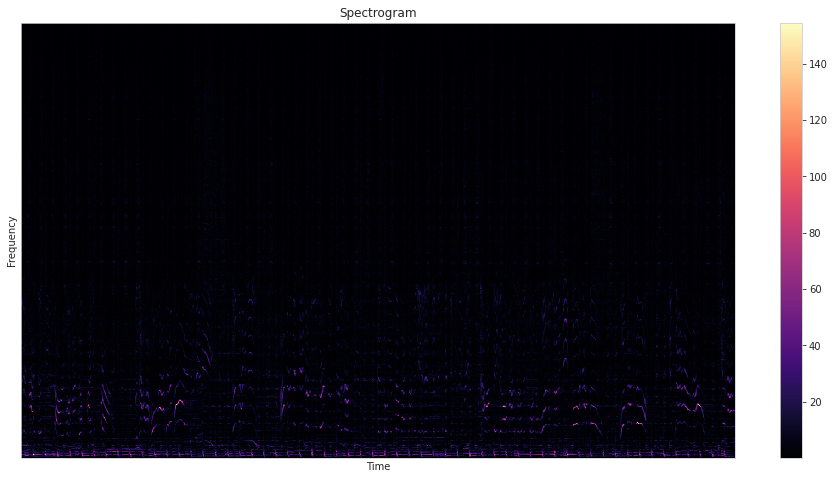

In [ ]:
# Plot the Spectrogram

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

In [ ]:
# Apply Logarithm to get values in Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

Text(0.5, 1.0, 'Spectrogram (dB)')

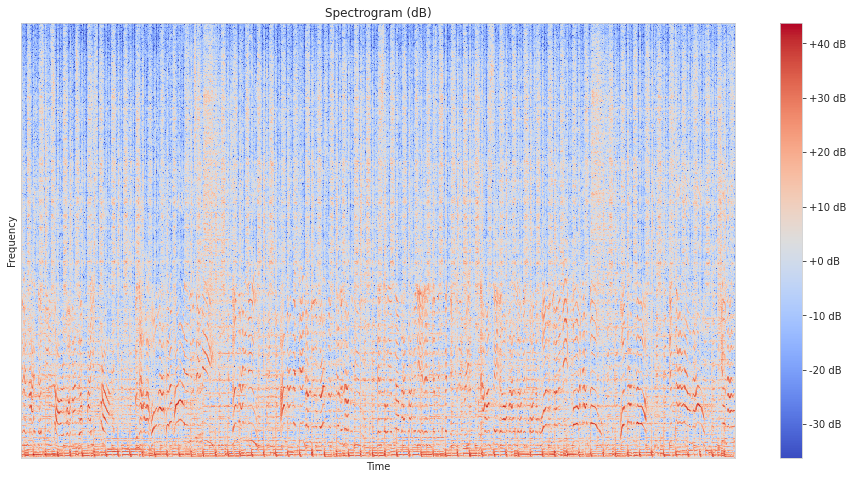

In [ ]:
# Plot the Spectrogram in Decibels,here we use log spectram instead of simple spectgram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

In [ ]:
# once again lower frequencies higher magnitude

# **Mel Frequency Cepstral Coefficients:**

These are state-of-the-art features used in automatic speech and speech recognition studies. There are a set of steps for generation of these features:

Since the audio signals are constantly changing, first we divide these signals into smaller frames. Each frame is around 20-40 ms long Then we try to identify different frequencies present in each frame Now, separate linguistic frequencies from the noise To discard the noise, it then takes discrete cosine transform (DCT) of these frequencies. Using DCT we keep only a specific sequence of frequencies that have a high probability of information.

In [ ]:
# MFCCs (we use 13 MFCCs)(Mel-frequency cepstrum-In sound processing, the mel-frequency cepstrum
# is a representation of the short-term power spectrum of a sound,
#based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.
# Mel-frequency cepstral coefficients are coefficients that collectively make up an MFC)

MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

Text(0.5, 1.0, 'MFCCs')

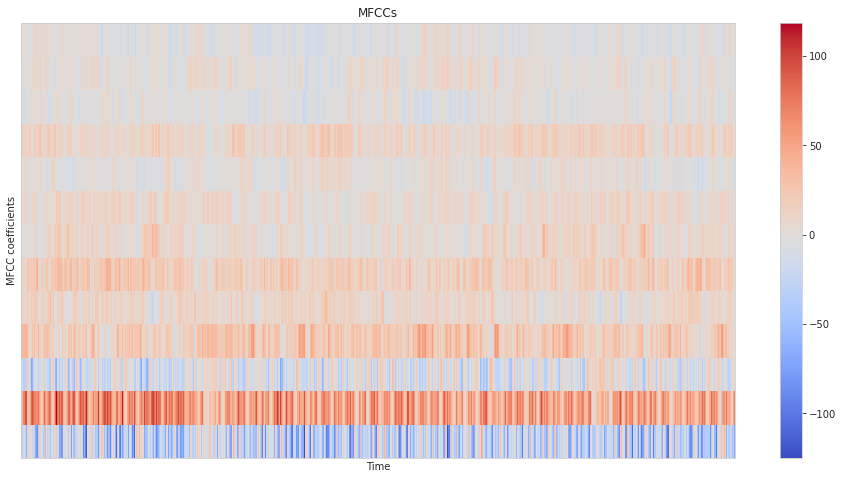

In [ ]:
# Plot MFCCs

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

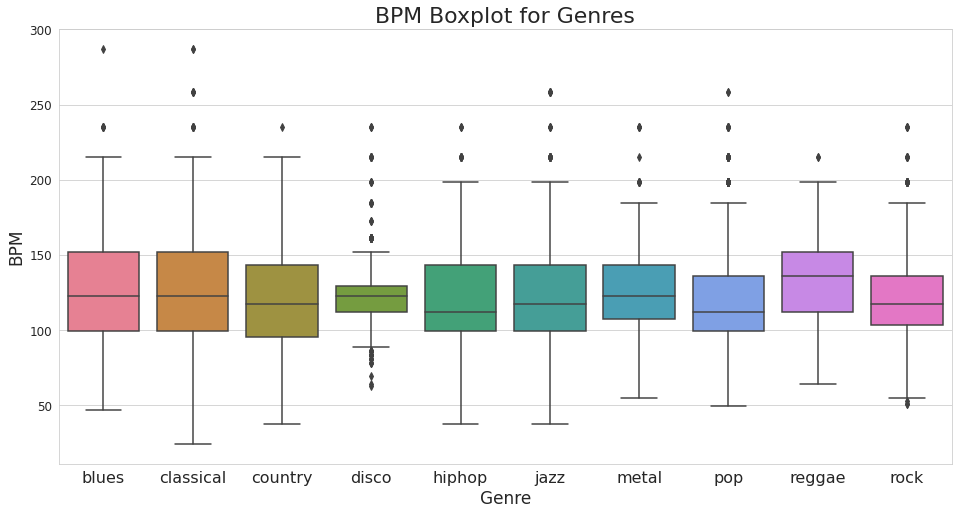

In [ ]:
x = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 22)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 12);
plt.xlabel("Genre", fontsize = 17)
plt.ylabel("BPM", fontsize = 17)
plt.savefig("BPM_Boxplot.png")

#**Data Preparation**

In [ ]:
# Handling missing values

print("Columns with null values are",list(df.columns[df.isnull().any()]))

Columns with null values are []


The are no columns with missing values in our dataset

In [ ]:
import json
import os
import math

In [ ]:
# Making MFCCs coeffients for all audio files,From blues folder to rock folder
# we will json file as our out put

In [ ]:
DATASET_PATH = "/content/gdrive/MyDrive/GTZAN/Data/genres_original"
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050#(22050 is the default sample rate of librosa)
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [ ]:
# this function to make preprocessing of audio files

def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along with genre labels.
        """

    # dictionary to store mapping, labels, and MFCCs(the data will be the output)
    data = {
        "mapping": [],    # will be the genres eg blues classical etc
        "labels": [],     # will be from 0-9 genres
        "mfcc": []        # will be the 13 genres we are using
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)     # we will round off the answer to t

    # the nearest whole number eg .76 will be rounded off to 0.8 ,once we get that we can loop through genre subfolder
    # eg blues all its files

    # loop through all genre sub-folder

    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level

        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping

            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir

            for f in filenames:

		# load audio file

                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file

                for d in range(num_segments):

                    # calculate start and finish sample for current segment

                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc

                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors

                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file

    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

# saving our results in a json file



In [ ]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)

Streaming output truncated to the last 5000 lines.
/content/gdrive/MyDrive/GTZAN/Data/genres_original/classical/classical.00002.wav, segment:8
/content/gdrive/MyDrive/GTZAN/Data/genres_original/classical/classical.00002.wav, segment:9
/content/gdrive/MyDrive/GTZAN/Data/genres_original/classical/classical.00002.wav, segment:10
/content/gdrive/MyDrive/GTZAN/Data/genres_original/classical/classical.00004.wav, segment:1
/content/gdrive/MyDrive/GTZAN/Data/genres_original/classical/classical.00004.wav, segment:2
/content/gdrive/MyDrive/GTZAN/Data/genres_original/classical/classical.00004.wav, segment:3
/content/gdrive/MyDrive/GTZAN/Data/genres_original/classical/classical.00004.wav, segment:4
/content/gdrive/MyDrive/GTZAN/Data/genres_original/classical/classical.00004.wav, segment:5
/content/gdrive/MyDrive/GTZAN/Data/genres_original/classical/classical.00004.wav, segment:6
/content/gdrive/MyDrive/GTZAN/Data/genres_original/classical/classical.00004.wav, segment:7
/content/gdrive/MyDrive/GTZA

## *example metal 001 has been splitted into 10 segments as seen in the pre processor above* bold text

In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras # building ur neural networks

import matplotlib.pyplot as plt
import random

import librosa# for preprocessing
import math

# Modeling and training

1.   Importing the json file output
2.   Compile,train and check results and evaluate
3. Manage overfitting
4.Build CNN
5.Pick some audio files and try to classify them



# Load Data

In [ ]:
# path to json
DATA_PATH = "/content/data_10.json"

In [ ]:
def load_data(data_path):

    with open(data_path, "r") as f:   # we are opening in read mode a file
        data = json.load(f)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

In [ ]:
# load data
X, y = load_data(DATA_PATH)

Data succesfully loaded!


In [ ]:
X.shape

(9986, 130, 13)

In [ ]:
# encoding the target variable
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# **Simple Artificial Neural Network(ANN)**

In [ ]:
# build network topology
model = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu'),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu'),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu'),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 512)               865792    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)


Epoch 1/100
219/219 [==============================] - 9s 37ms/step - loss: 6.8529 - accuracy: 0.2389 - val_loss: 2.2994 - val_accuracy: 0.1999
Epoch 2/100
219/219 [==============================] - 8s 37ms/step - loss: 2.0838 - accuracy: 0.2456 - val_loss: 2.1183 - val_accuracy: 0.2320
Epoch 3/100
219/219 [==============================] - 6s 27ms/step - loss: 1.9233 - accuracy: 0.3173 - val_loss: 2.0501 - val_accuracy: 0.2881
Epoch 4/100
219/219 [==============================] - 7s 34ms/step - loss: 1.8066 - accuracy: 0.3631 - val_loss: 2.0343 - val_accuracy: 0.3234
Epoch 5/100
219/219 [==============================] - 8s 35ms/step - loss: 1.7337 - accuracy: 0.3918 - val_loss: 1.9696 - val_accuracy: 0.3578
Epoch 6/100
219/219 [==============================] - 7s 33ms/step - loss: 1.6730 - accuracy: 0.4153 - val_loss: 1.9501 - val_accuracy: 0.3752
Epoch 7/100
219/219 [==============================] - 7s 33ms/step - loss: 1.6103 - accuracy: 0.4358 - val_loss: 1.9771 - val_accuracy:

From the above we can see the accuracy on the training is  95% and on validation set is at 62%,hence a big difference between training and validation set,hence overfitting in our model

In [ ]:
# a function to plot accuracy and loss
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

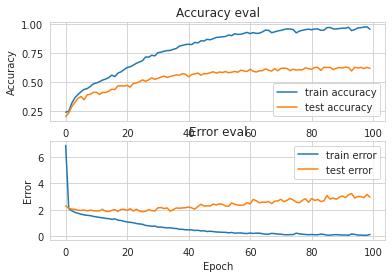

In [ ]:
# plot accuracy and error as a function of the epochs
plot_history(history)

From the plot above we can see that the accuracy of both and vaidation start at the same start from 0.after several epochs the difference is huge,and same is for loss

# **Managing overfitting**

In [ ]:
# build network topology
model_regularized = keras.Sequential([

    # input layer
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

    # 1st dense layer
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 2nd dense layer
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # 3rd dense layer
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # output layer
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_regularized.compile(optimizer=optimiser,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# train model
history = model_regularized.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
219/219 [==============================] - 11s 47ms/step - loss: 24.1817 - accuracy: 0.1491 - val_loss: 3.5313 - val_accuracy: 0.2146
Epoch 2/100
219/219 [==============================] - 9s 43ms/step - loss: 6.3756 - accuracy: 0.1667 - val_loss: 3.4519 - val_accuracy: 0.1405
Epoch 3/100
219/219 [==============================] - 9s 43ms/step - loss: 4.4481 - accuracy: 0.1531 - val_loss: 3.4614 - val_accuracy: 0.1302
Epoch 4/100
219/219 [==============================] - 13s 60ms/step - loss: 3.9149 - accuracy: 0.1559 - val_loss: 3.4658 - val_accuracy: 0.1238
Epoch 5/100
219/219 [==============================] - 10s 46ms/step - loss: 3.6922 - accuracy: 0.1571 - val_loss: 3.4263 - val_accuracy: 0.1509
Epoch 6/100
219/219 [==============================] - 9s 42ms/step - loss: 3.6154 - accuracy: 0.1545 - val_loss: 3.4069 - val_accuracy: 0.1552
Epoch 7/100
219/219 [==============================] - 9s 42ms/step - loss: 3.5544 - accuracy: 0.1554 - val_loss: 3.4038 - val_accur

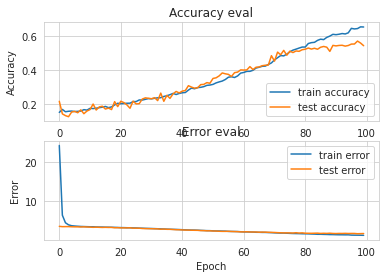

In [ ]:
# plot accuracy and error as a function of the epochs
plot_history(history)

# **Convolutional Neural Network**

In [ ]:
# create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# add an axis to input sets
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [ ]:
# build the CNN
model_cnn = keras.Sequential()

# 1st conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# 3rd conv layer
model_cnn.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

# output layer
model_cnn.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 6, 32)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 6, 32)        128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 2, 32)        0         
 2D)                                                             
                                                      

In [ ]:
# train model
history = model_cnn.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=100)

Epoch 1/100
188/188 [==============================] - 15s 73ms/step - loss: 2.5410 - accuracy: 0.2085 - val_loss: 1.9186 - val_accuracy: 0.3338
Epoch 2/100
188/188 [==============================] - 13s 72ms/step - loss: 1.9863 - accuracy: 0.3312 - val_loss: 1.6151 - val_accuracy: 0.4146
Epoch 3/100
188/188 [==============================] - 13s 72ms/step - loss: 1.7045 - accuracy: 0.4016 - val_loss: 1.4510 - val_accuracy: 0.4733
Epoch 4/100
188/188 [==============================] - 13s 71ms/step - loss: 1.5821 - accuracy: 0.4435 - val_loss: 1.3489 - val_accuracy: 0.5113
Epoch 5/100
188/188 [==============================] - 13s 71ms/step - loss: 1.4664 - accuracy: 0.4837 - val_loss: 1.2719 - val_accuracy: 0.5447
Epoch 6/100
188/188 [==============================] - 13s 70ms/step - loss: 1.3756 - accuracy: 0.5139 - val_loss: 1.2125 - val_accuracy: 0.5628
Epoch 7/100
188/188 [==============================] - 13s 72ms/step - loss: 1.3303 - accuracy: 0.5320 - val_loss: 1.1677 - val_ac

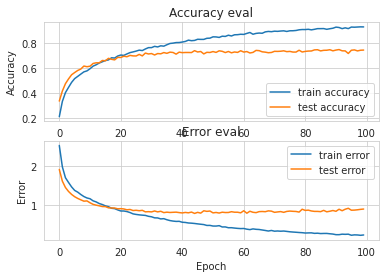

In [ ]:
# plot accuracy and error as a function of the epochs
plot_history(history)

In [ ]:
# evaluate model on Test Set
test_loss, test_acc = model_cnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

79/79 - 1s - loss: 0.8581 - accuracy: 0.7637 - 1s/epoch - 15ms/step

Test accuracy: 0.763716459274292


In [ ]:
model_cnn.save("Music_Genre_10_CNN")

INFO:tensorflow:Assets written to: Music_Genre_10_CNN/assets


In [ ]:
model_cnn.save("Music_Genre_10_CNN.h5")

In [ ]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("Music_Genre_10_CNN.h5")

# **Prediction on Test set**

In [ ]:
# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

In [ ]:
X_to_predict.shape

(130, 13, 1)

In [ ]:
print("Real Genre:", y_to_predict)

Real Genre: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# add a dimension to input data for sample - model.predict() expects a 4d array in this case
X_to_predict = X_to_predict[np.newaxis, ...] # array shape (1, 130, 13, 1)

In [ ]:
X_to_predict.shape

(1, 130, 13, 1)

In [ ]:
# perform prediction
prediction = model_cnn.predict(X_to_predict)

In [ ]:
# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Predicted Genre: 5


In [ ]:
# pick a sample to predict from the test set
X_to_predict = X_test[50]
y_to_predict = y_test[50]

print("Real Genre:", y_to_predict)

X_to_predict = X_to_predict[np.newaxis, ...]

prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", int(predicted_index))

Real Genre: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Predicted Genre: 6


In [ ]:
len(X_test)

2497

In [ ]:
for n in range(10):

  i = random.randint(0,len(X_test))
  # pick a sample to predict from the test set
  X_to_predict = X_test[i]
  y_to_predict = y_test[i]

  print("\nReal Genre:", y_to_predict)

  X_to_predict = X_to_predict[np.newaxis, ...]

  prediction = model_cnn.predict(X_to_predict)

  # get index with max value
  predicted_index = np.argmax(prediction, axis=1)

  print("Predicted Genre:", int(predicted_index))


Real Genre: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Predicted Genre: 8

Real Genre: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Predicted Genre: 4

Real Genre: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Predicted Genre: 4

Real Genre: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Predicted Genre: 9

Real Genre: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Predicted Genre: 6

Real Genre: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted Genre: 0

Real Genre: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Predicted Genre: 9

Real Genre: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Predicted Genre: 1

Real Genre: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Predicted Genre: 9

Real Genre: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Predicted Genre: 7


In [ ]:
# Audio files pre-processing
def process_input(audio_file, track_duration):

  SAMPLE_RATE = 22050
  NUM_MFCC = 13
  N_FTT=2048
  HOP_LENGTH=512
  TRACK_DURATION = track_duration # measured in seconds
  SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
  NUM_SEGMENTS = 10

  samples_per_segment = int(SAMPLES_PER_TRACK / NUM_SEGMENTS)
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / HOP_LENGTH)

  signal, sample_rate = librosa.load(audio_file, sr=SAMPLE_RATE)

  for d in range(10):

    # calculate start and finish sample for current segment
    start = samples_per_segment * d
    finish = start + samples_per_segment

    # extract mfcc
    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=NUM_MFCC, n_fft=N_FTT, hop_length=HOP_LENGTH)
    mfcc = mfcc.T

    return mfcc

In [ ]:
genre_dict = {0:"hiphop",1:"country",2:"jazz",3:"classical",4:"metal",5:"pop",6:"rock",7:"blues",8:"reggae",9:"disco"}

In [ ]:
new_input_mfcc = process_input("/content/Alicia_Keys_Unbreakable.mp3", 30)

In [ ]:
type(new_input_mfcc)

numpy.ndarray

In [ ]:
new_input_mfcc.shape

(130, 13)

In [ ]:
prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])

Predicted Genre: blues


In [ ]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

(1, 130, 13, 1)

In [ ]:
prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])

Predicted Genre: country


It Classified Mike poisners I took a pil in ibiza correctly.It is a tropical house [Pop Song](https://www.google.com/search?q=i+took+a+pill+in+ibiza+genre&oq=i+took+a+pill+in+ibiza+genre&aqs=chrome..69i57j0i22i30j0i390l4.7062j0j7&sourceid=chrome&ie=UTF-8)

In [ ]:
new_input_mfcc = process_input("/content/Backstreet_Boys_Drowning.mp3", 30)

In [ ]:
X_to_predict = new_input_mfcc[np.newaxis, ..., np.newaxis]
X_to_predict.shape

(1, 130, 13, 1)

In [ ]:
prediction = model_cnn.predict(X_to_predict)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])

Predicted Genre: pop


### #Classified Back street boyz song correctly-Its a [pop song](https://www.google.com/search?q=drowning+backstreet+boys&ei=EdbaYa_ODfTogwe51YL4Bw&gs_ssp=eJzj4tFP1zcsNM2qyjY0KzZg9JJIKcovz8vMS1dISkzOLi4pSk0tUUjKrywGAAujDfw&oq=drowning+back+&gs_lcp=Cgdnd3Mtd2l6EAEYADIECC4QCjIECAAQCjIECAAQCjIECAAQCjIECAAQCjIECAAQCjIECAAQCjIGCAAQFhAeMggIABAWEAoQHjIGCAAQFhAeOgQILhBDOgUILhCxAzoICAAQsQMQgwE6BQgAEIAEOgUILhCABDoLCC4QgAQQsQMQgwE6CAguELEDEJECOgUIABCRAjoECAAQQzoLCAAQgAQQsQMQgwE6CAgAEIAEELEDOggILhCABBCxAzoNCC4QsQMQxwEQ0QMQQ0oECEEYAEoECEYYAFAAWJYoYPEzaABwAngAgAH4AogBnyCSAQUyLTguNpgBAKABAcABAQ&sclient=gws-wiz)

In [ ]:
new_input_mfcc_four = process_input("/content/stella_by_freshley_mwamburi_mp3_48933.mp3", 30)


In [ ]:
X_to_predict_four = new_input_mfcc_four[np.newaxis, ..., np.newaxis]
X_to_predict_four.shape

(1, 130, 13, 1)

In [ ]:
prediction = model_cnn.predict(X_to_predict_four)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])

Predicted Genre: metal


It didnt predict Freshly -Stella wangu correctly-its [Reggae](https://www.google.com/search?q=stela+wangu+genre&ei=XN3aYY-2AZCkUqHSo7AJ&ved=0ahUKEwiP1LXh3aT1AhUQkhQKHSHpCJYQ4dUDCA4&uact=5&oq=stela+wangu+genre&gs_lcp=Cgdnd3Mtd2l6EAMyBwghEAoQoAE6BAgAEEc6BQgAEJECOgUILhCRAjoLCAAQgAQQsQMQgwE6BQgAEIAEOgUILhCABDoFCAAQsQM6CAguELEDEIMBOggIABCABBCxAzoICAAQsQMQgwE6DgguEIAEELEDEMcBEKMCOgUILhCxAzoECC4QQzoECAAQQzoKCC4QsQMQgwEQQzoICC4QgAQQsQM6BwgAELEDEEM6BAguEAo6BAgAEAo6CggAELEDEIMBEAo6CAgAEBYQChAeOgYIABAWEB46BAguEA06BAgAEA06BQgAEM0CSgQIQRgASgQIRhgAUOEFWP1KYIhOaARwA3gAgAHvAogB-CmSAQYyLTE4LjKYAQCgAQGwAQjIAQjAAQE&sclient=gws-wiz)

In [ ]:
new_input_mfcc_ten = process_input("/content/Firirinda Dick Njoroge)_160k.mp3", 30)


In [ ]:
X_to_predict_ten = new_input_mfcc_ten[np.newaxis, ..., np.newaxis]
X_to_predict_ten.shape

(1, 130, 13, 1)

In [ ]:
prediction = model_cnn.predict(X_to_predict_ten)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])

Predicted Genre: country


Predicted firirinda song as country,the correct genre its a [Indie](https://www.google.com/search?q=what+genre+is+firirinda&oq=what+genre+is+firirinda&aqs=chrome..69i57.7356j0j7&sourceid=chrome&ie=UTF-8)

In [ ]:
new_input_mfcc_eleven = process_input("/content/Ariana_Grande_7_rings.mp3", 30)


In [ ]:
X_to_predict_eleven = new_input_mfcc_eleven[np.newaxis, ..., np.newaxis]
X_to_predict_eleven.shape

(1, 130, 13, 1)

In [ ]:
prediction = model_cnn.predict(X_to_predict_eleven)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])

Predicted Genre: pop


Predicted ariana grandes 7 rings correctly as [pop song](https://www.google.com/search?q=7+rings+ariana+grande&ei=xSzkYdXiN4rClwTn4ImwBQ&gs_ssp=eJzj4tVP1zc0TMvKMy4wqbA0YPQSNVcoysxLL1ZILMpMzEtUSC9KzEtJBQDdLgws&oq=7+rings+&gs_lcp=Cgdnd3Mtd2l6EAEYATIFCAAQkQIyBAguEEMyBQgAEIAEMgUILhCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCRAjoICC4QsQMQgwE6CwguEIAEELEDEIMBOggIABCxAxCDAToHCC4QsQMQQzoFCC4QkQI6CgguEMcBEKMCEEM6CwgAEIAEELEDEIMBOgQIABBDOgcIABCxAxBDOgoILhDHARDRAxBDOggILhCABBCxAzoICAAQgAQQsQM6DgguEIAEELEDEMcBENEDSgQIQRgASgQIRhgAUM4GWJVBYNFUaAhwAXgAgAG9BIgB_iaSAQkyLTguNC4wLjOYAQCgAQGwAQDAAQE&sclient=gws-wiz)

In [ ]:
new_input_mfcc_twelve = process_input("/content/Timmy_Tdat_x_Dela_We_ll_Be_Ok_Official_Video_Long_Version.mp3", 30)

In [ ]:
X_to_predict_twelve = new_input_mfcc_twelve[np.newaxis, ..., np.newaxis]
X_to_predict_twelve.shape

(1, 130, 13, 1)

In [ ]:
prediction = model_cnn.predict(X_to_predict_twelve)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

print("Predicted Genre:", genre_dict[int(predicted_index)])

Predicted Genre: classical


**Conclusion**

We can use the CNN model we made for music genre classification for any song

**Recommendation**

Improve our model accuracy